## Setting up the environment

In [ ]:
!pip install wordcloud

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

## Loading the data

In [ ]:
test_bert = '/content/drive/MyDrive/BERT/test_results_bert.csv'
test_roberta = '/content/drive/MyDrive/RoBERTa/test_results_roberta.csv'
test_fasttext = '/content/drive/MyDrive/data/results_fasttext.csv'

#### Load the evaluation results of the BERT model on the dev dataset

In [ ]:
bert = pd.read_csv(test_bert)
bert.head()

,Unnamed: 0,predictions,target
0,0,0.763953,1.0
1,1,1.036811,0.8
2,2,0.805419,0.6
3,3,0.857159,1.6
4,4,1.090844,0.4


#### Load the evaluation results of the RoBERTa model on the dev dataset

In [ ]:
roberta = pd.read_csv(test_roberta)
roberta.head()

,Unnamed: 0,predictions,target
0,0,1.071953,1.0
1,1,1.185844,0.8
2,2,0.945423,0.6
3,3,0.692117,1.6
4,4,0.979488,0.4


#### Load the evaluation results of the LSTM model with FastText embeddings on the dev dataset

In [ ]:
fasttext = pd.read_csv(test_fasttext)
fasttext.head()

,Unnamed: 0,id,original,edit,grades,meanGrade,predictions,difference,target
0,0,1723,Thousands of gay and bisexual <men/> convicted...,swans,22100,1.0,0.977588,0.022412,1.0
1,1,12736,Special <prosecutor/> appointed to Trump Russia,chef,21100,0.8,0.932367,0.132367,0.8
2,2,12274,Spanish police detain man and search Ripoll ad...,squad,21000,0.6,0.886526,0.286526,0.6
3,3,8823,N.Y. Times <reprimands/> reporter for sharing ...,applauds,32210,1.6,0.987609,0.612391,1.6
4,4,5087,Vladimir Putin Releases Video Simulation Of Ru...,balloon,11000,0.4,1.373463,0.973463,0.4


#### Calculate difference between predicted and target

In [ ]:
# Get the difference between predicted and target

roberta['diff'] = abs(roberta.predictions - roberta.target)
bert['diff'] = abs(bert.predictions - bert.target)

#### Show the regression line / prediction histograms for all the models

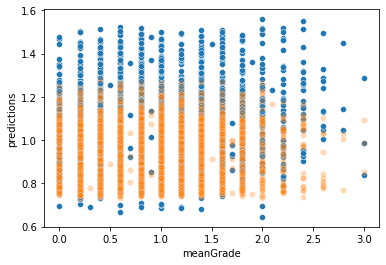

In [ ]:
sns.scatterplot(x='meanGrade', y='predictions', data=fasttext)
sns.scatterplot(x='target', y='predictions', data=bert, alpha=0.3)
# sns.scatterplot(x='target', y='predictions', data=roberta)

(array([  2.,  11.,   6.,  24.,  38.,  58., 108., 147., 170., 167., 187.,
        163., 126., 138., 126., 125., 126., 108.,  97.,  86.,  80.,  59.,
         58.,  54.,  41.,  34.,  35.,  26.,  17.,   2.]),
 array([0.6443602 , 0.67484744, 0.70533468, 0.73582192, 0.76630916,
        0.7967964 , 0.82728364, 0.85777088, 0.88825812, 0.91874536,
        0.9492326 , 0.97971984, 1.01020708, 1.04069432, 1.07118156,
        1.1016688 , 1.13215604, 1.16264328, 1.19313052, 1.22361776,
        1.254105  , 1.28459224, 1.31507948, 1.34556672, 1.37605396,
        1.4065412 , 1.43702844, 1.46751568, 1.49800292, 1.52849016,
        1.5589774 ]),
 <a list of 30 Patch objects>)

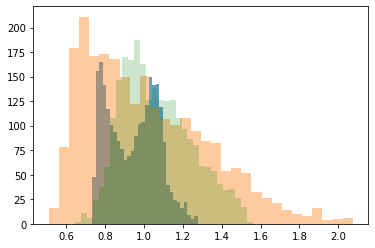

In [ ]:
plt.hist(bert.predictions, bins=30, alpha=0.7)
plt.hist(roberta.predictions, bins=30, alpha=0.4)
plt.hist(fasttext.predictions, bins=30, color='green', alpha=0.2)
# plt.hist(fasttext.meanGrade, bins=30)

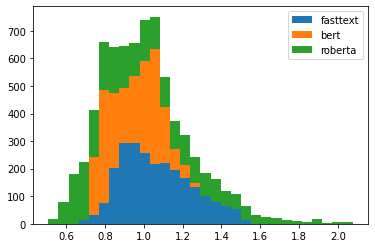

In [ ]:
plt.hist([fasttext.predictions, bert.predictions, roberta.predictions], bins=30, histtype='barstacked', label=['fasttext', 'bert','roberta'])
# plt.hist(bert.target, bins=30)
plt.legend()
plt.show()

## Get the data that was misclassified for all three models

To get this data, we use a threshold of 1.0, i.e, if the difference between predicted and target is greater than 1.0, it is misclassified.

In [ ]:
fasttext_misclassified = fasttext[fasttext.difference >= 1.0]
bert_misclassified = bert[bert['diff'] >= 1.0]
roberta_misclassified = roberta[roberta['diff'] >= 1.0]

In [ ]:
fast_mis_ids = set(fasttext_misclassified['Unnamed: 0'])
bert_mis_ids = set(bert_misclassified['Unnamed: 0'])
roberta_mis_ids = set(roberta_misclassified['Unnamed: 0'])

In [ ]:
# Sentences that were misclassified by all three models
completely_misclassified = fast_mis_ids.intersection(bert_mis_ids).intersection(roberta_mis_ids)

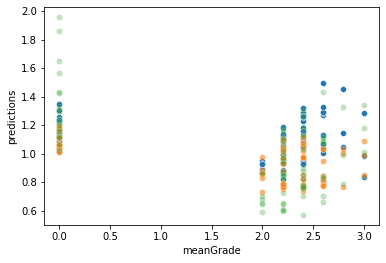

In [ ]:
ax1 = sns.scatterplot(x='meanGrade', y='predictions', data=fasttext.loc[completely_misclassified])
ax2 = sns.scatterplot(x='target', y='predictions', data=bert.loc[completely_misclassified], alpha=0.6)
ax3 = sns.scatterplot(x='target', y='predictions', data=roberta.loc[completely_misclassified], alpha=0.3)

## Get data that was classified correctly

In [ ]:
fasttext_classified = fasttext[fasttext.difference < 1.0]
bert_classified = bert[bert['diff'] < 1.0]
roberta_classified = roberta[roberta['diff'] < 1.0]

In [ ]:
fast_corr_ids = set(fasttext_classified['Unnamed: 0'])
bert_corr_ids = set(bert_classified['Unnamed: 0'])
roberta_corr_ids = set(roberta_classified['Unnamed: 0'])

## Get wordclouds of the edited words for setences that were correctly classified by one model, but misclassified by the others

The idea is to see if any one model is able to learn something that the other models cannot.

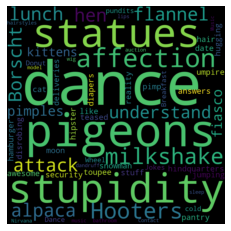

In [ ]:
# Get sentences correctly classified by LSTM, but not BERT or RoBERTa

fast_nbert_nroberta = fast_corr_ids.intersection(bert_mis_ids).intersection(roberta_mis_ids)
fasttext.loc[fast_nbert_nroberta][['original', 'edit']]

word_freqs = Counter(fasttext.loc[fast_nbert_nroberta]['edit'])
wordcloud = WordCloud(width=1024, height=1024, margin=0).generate_from_frequencies(word_freqs)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)

Counter({'case': 1, 'Man': 1, 'Say': 1, 'President': 1, 'handbags': 1, 'trail': 1, 'ignite': 1, 'sandwich': 1, 'millennia': 1, 'attack': 1, 'scout': 1, 'trial': 1, 'printers': 1, 'parolees': 1, 'tickle': 1, 'marijuana': 1, 'hero': 1, 'Fathers': 1, 'cabinet': 1, 'president': 1, 'returns': 1, 'Politicians': 1, 'jockeys': 1, 'Buddhism': 1, 'LICKING': 1, 'heater': 1})


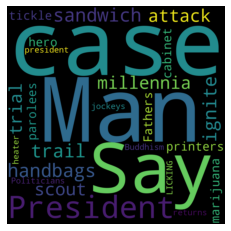

In [ ]:
# Get sentences correctly classified by BERT, but not LSTM or RoBERTa

bert_nfast_nroberta = bert_corr_ids.intersection(fast_mis_ids).intersection(roberta_mis_ids)
word_freqs_bert = Counter(fasttext.loc[bert_nfast_nroberta]['edit'])
print(word_freqs_bert)
wordcloud_bert = WordCloud(width=1024, height=1024, margin=0).generate_from_frequencies(word_freqs_bert)

plt.imshow(wordcloud_bert, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)

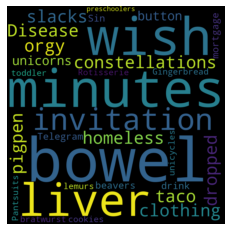

In [ ]:
# Get sentences correctly classified by RoBERTa, but not LSTM or BERT

roberta_nbert_nfast = roberta_corr_ids.intersection(fast_mis_ids).intersection(bert_mis_ids)
word_freqs_roberta = Counter(fasttext.loc[roberta_nbert_nfast]['edit'])
wordcloud_roberta = WordCloud(width=1024, height=1024, margin=0).generate_from_frequencies(word_freqs_roberta)

plt.imshow(wordcloud_roberta, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)

In [ ]:
fasttext_ids = list(fast_nbert_nroberta)
bert_ids = list(bert_nfast_nroberta)
roberta_ids = list(roberta_nbert_nfast)


In [ ]:
def get_wrongly_classified_sentences(df, ids):
  for i in range(5):
    print(df['original'][ids[i]], " | ", df['edit'][ids[i]])

In [ ]:
get_wrongly_classified_sentences(fasttext, fasttext_ids)

FBI Director Comey meets with <senators/> on matters related to Trump Tower  |  pigeons
Republican voters ’ loyalty to <Trump/> shows that the GOP has become an ' anti-idea ' party  |  stupidity
ISIS takes Hollywood <stars/> hostage at the Oscars  |  statues
Denmark builds giant spy station to capture Russian <intelligence/>   |  affection
President Trump 's trade shakeup has n't delivered the ' better <deal/> ' he promised  |  milkshake


In [ ]:
get_wrongly_classified_sentences(fasttext, bert_ids)

Gorsuch told he is likely Trump 's Supreme Court <pick/> : CNN  |  case
 <Vehicle/> Plows Into Pedestrians Outside Museum . Eleven people were injured in the crash . One man was detained  |  Man
What Did Putin Know and When Did He <Know/> It ?  |  Say
Russian <ambassador/> says he wo n't name all the Trump officials he 's met with : ' The list is so long "  |  President
Strongman known as " Crocodile " ready to continue the legacy of <Robert Mugabe/> ( you ca n't make this shit up ! ) .  |  handbags


In [ ]:
get_wrongly_classified_sentences(fasttext, roberta_ids)

Trump to address Republican lawmakers in latest <healthcare/> push  |  bowel
Sean Spicer resigns as Trump press secretary after six <months/> | US news  |  minutes
Donald Trump Jr. stumbled while trying to make a <mark/> in the business world  |  wish
The Russian attorney at the <heart/> of the scandal says Donald Trump Jr. " badly " wanted dirt on Hillary Clinton  |  liver
Hillary Clinton gets standing <ovation/> at Trump luncheon  |  invitation
